<a href="https://colab.research.google.com/github/MatheoCruz/BLR_imputation_perovskite/blob/main/Imputacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODELO DE IMPUTACION DE UN DATO FALTANTE

In [2]:
#Conexion con google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import ipywidgets as widgets
from IPython.display import display

In [4]:
#Cargamos los modelos para cada variable
ruta_drive = '/content/drive/MyDrive/Deep Learning/TG/'
with open(ruta_drive + 'trazados.pkl', 'rb') as f:
    modelos = pickle.load(f)
with open(ruta_drive + 'transformaciones.pkl', 'rb') as f:
    transformaciones = pickle.load(f)
with open(ruta_drive + 'data_train.pkl', 'rb') as f:
    data_train = pickle.load(f)

#Modelos


In [42]:
#Modelos escogidos
modelo_escogido = {
    "Band_gap": 1,
    "DeltaH": 3,
    "DeltaL": 2,
    "Grain_size": 2,
    "Thickness": 4,
    "PCE": 1,
    "Voc": 1,
    "Jsc": 1,
    "FF": 4
}
modelo = {}
x_mean = {}
x_std = {}
y_mean = {}
y_std = {}
for var in modelo_escogido:
  modelo[var] = modelos[f"trace_{var}"][f"trace_fold{modelo_escogido[var]}"]["posterior"]
#Extraemos media y std
for var in modelo_escogido:
  x_mean[var] = data_train[f'data_train_{var}'][f'train_fold_{modelo_escogido[var]}']["x_mean"]
  x_std[var] = data_train[f'data_train_{var}'][f'train_fold_{modelo_escogido[var]}']["x_std"]
  y_mean[var] = data_train[f'data_train_{var}'][f'train_fold_{modelo_escogido[var]}']["y_mean"]
  y_std[var] = data_train[f'data_train_{var}'][f'train_fold_{modelo_escogido[var]}']["y_std"]

#Captura de datos de entrada

In [9]:
# Crear widgets para las variables
Ion_A = widgets.Text(description="A", layout=widgets.Layout(width='200px'))
Ion_B = widgets.Text(description="B", layout=widgets.Layout(width='200px'))
Ion_X = widgets.Text(description="X", layout=widgets.Layout(width='200px'))
Band_gap = widgets.Text(description="Band_gap", layout=widgets.Layout(width='200px'))
DeltaH = widgets.Text(description="DeltaH", layout=widgets.Layout(width='200px'))
DeltaL = widgets.Text(description="DeltaL", layout=widgets.Layout(width='200px'))
Grain_size= widgets.Text(description="Grain_size", layout=widgets.Layout(width='200px'))
Thickness = widgets.Text(description="Thickness", layout=widgets.Layout(width='200px'))
PCE = widgets.Text(description="PCE", layout=widgets.Layout(width='200px'))
Voc = widgets.Text(description="Voc", layout=widgets.Layout(width='200px'))
Jsc = widgets.Text(description="Jsc", layout=widgets.Layout(width='200px'))
FF = widgets.Text(description="FF", layout=widgets.Layout(width='200px'))

# Función para guardar los valores ingresados
def guardar_valores(_):
    global valores
    valores = {}
    variables = [Ion_A, Ion_B, Ion_X, Band_gap, DeltaH, DeltaL, Grain_size, Thickness, PCE, Voc, Jsc, FF]
    for var_widget in variables:
        var_nombre = var_widget.description
        var_valor = var_widget.value.strip()  # Eliminar espacios en blanco
        if not var_valor:
            print(f"Error: '{var_nombre}' es obligatorio.")
            return
        try:
            if var_valor == "-":
              pass
            else:
              var_valor = float(var_valor)  # Intentar convertir a flotante
              valores[var_nombre] = var_valor
        except ValueError:
            print(f"Error: '{var_nombre}' debe ser un número válido.")
            return

    print("Valores guardados:", valores)

# Botón de guardar
boton_guardar = widgets.Button(description="Guardar")
boton_guardar.on_click(guardar_valores)

print("Para la variable faltante poner un -")
print("Unidades obligatorias para cada variable: [Ion_A : -], [Ion_B : -], [Ion_X : -], [Band gap : eV], [DeltaH : eV], [DeltaL : eV], [Grain size : mm], [Thickness : mm], [PCE, %], [Voc: V], [Jsc: mA/cm^2], [FF: %]\n")

# Crear una cuadrícula para organizar los widgets en filas y columnas
grid = widgets.GridspecLayout(3, 4)  # Dos filas y cuatro columnas

# Colocar las cajas de texto en la cuadrícula
grid[0, 0] = Ion_A
grid[0, 1] = Ion_B
grid[0, 2] = Ion_X
grid[0, 3] = Band_gap
grid[1, 0] = DeltaH
grid[1, 1] = DeltaL
grid[1, 2] = Grain_size
grid[1, 3] = Thickness
grid[2, 0] = PCE
grid[2, 1] = Voc
grid[2, 2] = Jsc
grid[2, 3] = FF

# Mostrar el formulario con las cajas de texto en horizontal
display(grid, boton_guardar)


Para la variable faltante poner un -
Unidades obligatorias para cada variable: [Ion_A : -], [Ion_B : -], [Ion_X : -], [Band gap : eV], [DeltaH : eV], [DeltaL : eV], [Grain size : mm], [Thickness : mm], [PCE, %], [Voc: V], [Jsc: mA/cm^2], [FF: %]



GridspecLayout(children=(Text(value='', description='A', layout=Layout(grid_area='widget001', width='200px')),…

Button(description='Guardar', style=ButtonStyle())

Valores guardados: {'A': 1.0, 'B': 1.0, 'X': 1.0, 'Band_gap': 1.0, 'DeltaH': 1.0, 'DeltaL': 1.0, 'Grain_size': 1.0, 'PCE': 2.0, 'Voc': 3.0, 'Jsc': 1.0, 'FF': 1.0}
Valores guardados: {'A': 1.0, 'B': 1.0, 'X': 1.0, 'Band_gap': 1.5, 'DeltaH': 0.2, 'DeltaL': 0.0, 'Grain_size': 0.425, 'Thickness': 0.35, 'PCE': 15.15, 'Voc': 1.039, 'Jsc': 20.71}
Valores guardados: {'A': 1.0, 'B': 1.0, 'X': 1.0, 'Band_gap': 1.5, 'DeltaH': 0.2, 'DeltaL': 0.0, 'Thickness': 0.35, 'PCE': 15.15, 'Voc': 1.039, 'Jsc': 20.71, 'FF': 0.704}
Valores guardados: {'A': 1.0, 'B': 1.0, 'X': 1.0, 'Band_gap': 1.5, 'DeltaH': 0.2, 'DeltaL': 0.0, 'Grain_size': 0.405, 'Thickness': 0.35, 'Voc': 1.039, 'Jsc': 20.71, 'FF': 0.704}
Valores guardados: {'A': 1.0, 'B': 1.0, 'X': 1.0, 'Band_gap': 1.5, 'DeltaH': 0.2, 'DeltaL': 0.0, 'Grain_size': 0.405, 'Thickness': 0.35, 'PCE': 15.15, 'Jsc': 20.71, 'FF': 0.704}
Valores guardados: {'A': 1.0, 'B': 1.0, 'X': 1.0, 'Band_gap': 1.5, 'DeltaH': 0.2, 'DeltaL': 0.0, 'Grain_size': 0.405, 'Thickness': 

#Prediccion dado los datos de entrada


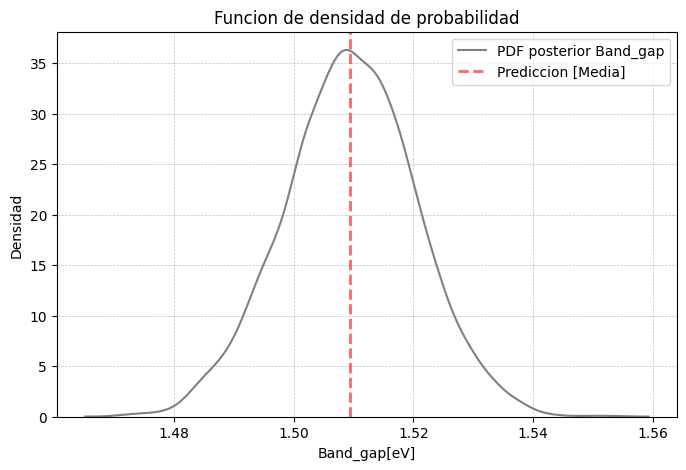

In [50]:
dict_transformaciones = dict(zip(["None", "log", "exp", "square", "sqrt"], [None, np.log, np.exp, np.square, np.sqrt])) #Diccionario de transformaciones
draws = 1000
chains = 5
grid_style = {'color': 'gray', 'linestyle': '--', 'linewidth': 0.5, 'alpha': 0.5}
unidades = {"Band_gap": "eV", "DeltaH": "eV", "DeltaL": "eV", "Grain_size": "mm", "Thickness": "mm", "PCE": "%", "Voc": "V", "Jsc": "mA/cm^2", "FF": "%"}
var_modelo = [elemento for elemento in list(modelo.keys()) if elemento not in list(valores.keys())[3:]]
var_modelo = var_modelo[0]
entradas = []
betas = []
#Transfomaciones
for var in valores:
  associated_transformation = dict_transformaciones[transformaciones[var_modelo][var]] #Se asocia la variable de entrada a una transformacion optima por variable.
  var_transformada = valores[var] if associated_transformation is None else associated_transformation(valores[var]) # Se realiza la transformacion.
  entradas.append(var_transformada)
  betas.append(np.concatenate(modelo[var_modelo][var]))
#Estimaciones
temp = entradas[1]
entradas = (entradas-x_mean[var_modelo])/x_std[var_modelo]
entradas[1] = temp
alpha = modelo[var_modelo][f"Alpha_{var_modelo}"]
y_pred = (np.asarray(alpha).reshape((draws*chains)) + np.dot(entradas,np.asarray(betas)))
y_pred = y_pred*(y_std[var_modelo]) + y_mean[var_modelo]
mean = np.mean(y_pred, axis = 0)
std = np.std(y_pred, axis = 0)
plt.figure(figsize=(8, 5))
posterior_predictive = sns.kdeplot(y_pred, label = f'PDF posterior {var_modelo}', color = "gray")
# Calcular la media de la distribución de densidad posterior
# Agregar línea vertical para la media de la distribución posterior
plt.axvline(x=mean, color='r', linestyle='--', linewidth=2, label='Prediccion [Media]', alpha = 0.6)
plt.xlabel(f"{var_modelo}[{unidades[var_modelo]}]")
plt.ylabel("Densidad")
plt.title("Funcion de densidad de probabilidad")
plt.legend()
plt.grid(True, **grid_style)
plt.show()